0
[0.69803274, 0.546875]
22144/29982 [=====================>........] - ETA: 0s [0.66277485651311796, 0.63601494229871258]
1
[0.7060194, 0.875]
23168/29982 [======================>.......] - ETA: 0s[0.64793218215926862, 0.66092989129592639]
2
[0.65332502, 0.75]
29312/29982 [============================>.] - ETA: 0s[0.63391767243723185, 0.68791274764461308]
3
[0.71346104, 0.96875]
29696/29982 [============================>.] - ETA: 0s

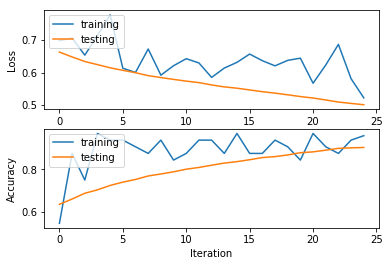

28160/29982 [===========================>..] - ETA: 0s  

In [8]:
# Read csv & model selection
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Train data with DL model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model
from keras.utils import np_utils

# Plot the eva results    
import matplotlib.pyplot as plt

# Load training & test data
input_test_data = []
input_train_data = []

def convert(data_array):
    feature_array = []
    label_array = []
    for d in data_array:
        features = [float(x) for x in d[0:len(d)-1]]
        label = d[len(d)-1]
        feature_array.append(features)
        label_array.append(label)
    return feature_array, label_array

# Please replace it with your local file (header removed)
# Load testing data (human-labelled)
with open('/Users/yjiang/Dropbox/DLData/humanlabelled.csv', newline='') as csvfile:
    data_iter = csv.reader(csvfile, delimiter=',', quotechar='|')
    input_test_data = [data for data in data_iter]
# Load traning data (user-generated)
with open('/Users/yjiang/Dropbox/DLData/backup/training_auto_new_only_query.csv', newline='') as csvfile:
    data_iter = csv.reader(csvfile, delimiter=',', quotechar='|')
    input_train_data = [data for data in data_iter]
        
# train, test = train_test_split(input_data, test_size = 0.3)
# test_data, test_labels = convert(test)
test_data_x, test_labels = convert(input_test_data)
train_data, train_labels = convert(input_train_data)

# scaler = preprocessing.StandardScaler().fit(test_data)
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data =  scaler.transform(test_data_x)
train_labels = np_utils.to_categorical(train_labels, num_classes=2)
test_labels = np_utils.to_categorical(test_labels, num_classes=2)


# Build NN 
model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Batch processing
#==============================================================================
# model.fit(train_data, train_labels, epochs = 50, batch_size = 128)
# loss_and_metrics = model.evaluate(test_data, test_labels, batch_size = 128)
# print(loss_and_metrics)
# # Plot out the model shape
# plot_model(model, to_file='model.png', show_shapes = "true")
#==============================================================================

# Online learning
increment = 32
chunks_train_data = [train_data[x:x+increment] for x in range(0, len(train_data), increment)]
chunks_train_labels = [train_labels[x:x+increment] for x in range(0, len(train_labels), increment)]

test_accuracy = [];
test_loss = [];
train_accuracy = [];
train_loss = [];
for i, el in enumerate(chunks_train_data):
    print(i)
    train_loss_and_metrics = model.train_on_batch(el, chunks_train_labels[i])
    print(train_loss_and_metrics)
    train_loss.append(train_loss_and_metrics[0])
    train_accuracy.append(train_loss_and_metrics[1])
    test_loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=128)
    print(test_loss_and_metrics)
    test_loss.append(test_loss_and_metrics[0])
    test_accuracy.append(test_loss_and_metrics[1])

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(train_loss)
ax1.plot(test_loss)
ax1.set_ylabel('Loss')
ax1.set_xlabel('Iteration')
ax1.legend(['training', 'testing'], loc='upper left')

ax2 = fig.add_subplot(212)
ax2.plot(train_accuracy)
ax2.plot(test_accuracy)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Iteration')
ax2.legend(['training', 'testing'], loc='upper left')
plt.show()

#==============================================================================
# sample = np.array([[0,0,0,0,0,0,0,0,0,0]])
# prediction = model.predict(sample)
# # model.predict_classes(sample)
# print(prediction)
#==============================================================================


prediction = model.predict_classes(test_data)
output = np.column_stack((test_data_x, test_labels, prediction))
np.savetxt("/Users/yjiang/Dropbox/DLData/test_result.csv", output, delimiter=",")